# **Box Office Network Analysis of MCU**

In [65]:
# !pip install python-louvain
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from community import community_louvain

from google.colab import drive
drive.mount('/content/drive')
%cd drive/Shareddrives/ORF387 MCM Group Project/
# ------------------------------------------------------------------------------
# Step 1: Load the datasets
# ------------------------------------------------------------------------------
nodes = pd.read_csv('nodes.csv')
edges = pd.read_csv('edges.csv')
hero_network = pd.read_csv('hero-network.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/Shareddrives/ORF387 MCM Group Project/'
/content/drive/Shareddrives/ORF387 MCM Group Project


In [66]:
# Load the box office dataset
box_office_data = pd.read_csv('MarvelBoxOffice.csv')

# Initialize an empty list to store data
hero_revenue_list = []

# Iterate through each row of the dataframe
for index, row in box_office_data.iterrows():
    # Split the heroes by ", " to get individual heroes
    heroes = row['Heros'].split(", ")
    # Create a new row for each hero with their respective revenue
    for hero in heroes:
        hero_revenue_list.append({
            'Hero': hero.strip(),  # Remove leading/trailing whitespace
            'Worldwide Revenue (USD)': float(row['Worldwide Revenue (USD)'].replace(',', '')),  # Convert to float
            'Domestic Revenue (USD)': float(row['Domestic Revenue (USD)'].replace(',', ''))  # Convert to float
        })

# Create a new dataframe from the list of hero revenue data
hero_revenue_data = pd.DataFrame(hero_revenue_list)

# Remove rows where the 'Hero' column is blank
hero_revenue_data = hero_revenue_data[hero_revenue_data['Hero'] != '']

# Group by hero and sum up the revenue
hero_total_revenue = hero_revenue_data.groupby('Hero').sum()

# Calculate the total revenue of all movies
total_box_office_revenue = hero_revenue_data['Worldwide Revenue (USD)'].sum()

# Calculate the percentage contribution of each hero
hero_total_revenue['Contribution (%)'] = hero_total_revenue['Worldwide Revenue (USD)'] / total_box_office_revenue * 100

# Sort the heroes by their total revenue
hero_total_revenue = hero_total_revenue.sort_values(by='Worldwide Revenue (USD)', ascending=False)

print(hero_total_revenue)


                    Worldwide Revenue (USD)  Domestic Revenue (USD)  \
Hero                                                                  
Iron Man                       1.237712e+10            4.536674e+09   
Vision                         1.202012e+10            3.941467e+09   
Thor                           1.036469e+10            3.665260e+09   
Black Widow                    9.903493e+09            3.471035e+09   
Captain America                9.894311e+09            3.464038e+09   
Doctor Strange                 9.109278e+09            3.300196e+09   
Spider-Man                     8.907039e+09            3.139781e+09   
Hawkeye                        8.808975e+09            3.027637e+09   
Hulk                           8.773075e+09            3.069417e+09   
Scarlet Witch                  8.245193e+09            2.815610e+09   
Black Panther                  8.089927e+09            3.099161e+09   
Drax the Destroyer             7.975028e+09            2.962968e+09   
Groot 

In [67]:
hero_revenue_data

,Hero,Worldwide Revenue (USD),Domestic Revenue (USD)
0,Iron Man,5.851742e+08,318604126.0
1,War Machine,5.851742e+08,318604126.0
2,Iron Man,2.634276e+08,134806913.0
3,Hulk,2.634276e+08,134806913.0
4,Iron Man,6.239333e+08,312433331.0
5,War Machine,6.239333e+08,312433331.0
6,Thor,4.493266e+08,181030624.0
7,Loki,4.493266e+08,181030624.0
8,Odin,4.493266e+08,181030624.0
9,Captain America,3.705698e+08,176654505.0


In [68]:
hero_total_revenue

,Worldwide Revenue (USD),Domestic Revenue (USD),Contribution (%)
Hero,,,
Iron Man,1.237712e+10,4.536674e+09,5.742232
Vision,1.202012e+10,3.941467e+09,5.576605
Thor,1.036469e+10,3.665260e+09,4.808586
Black Widow,9.903493e+09,3.471035e+09,4.594621
Captain America,9.894311e+09,3.464038e+09,4.590361
Doctor Strange,9.109278e+09,3.300196e+09,4.226153
Spider-Man,8.907039e+09,3.139781e+09,4.132326
Hawkeye,8.808975e+09,3.027637e+09,4.086830
Hulk,8.773075e+09,3.069417e+09,4.070175


In [69]:
import pandas as pd
import itertools

# Load the box office dataset
box_office_data = pd.read_csv('MarvelBoxOffice.csv')

# Initialize an empty dictionary to store joint revenue for each hero pair
collaborator_total_revenue = {}

# Iterate through each row of the dataframe
for index, row in box_office_data.iterrows():
    # Split the heroes by ", " to get individual heroes
    heroes = row['Heros'].split(", ")
    # Create edges between all pairs of heroes appearing in the same movie
    for pair in itertools.combinations(heroes, 2):
        # Check if any hero in the pair is blank
        if '' in pair:
            continue  # Skip pairs with blank heroes
        # Sort the pair to ensure consistency in key creation
        pair = tuple(sorted(pair))
        # Check if the hero pair already exists in the dictionary
        if pair in collaborator_total_revenue:
            # Increment the joint revenue for the existing pair
            collaborator_total_revenue[pair] += float(row['Worldwide Revenue (USD)'].replace(',', ''))
        else:
            # Add the hero pair to the dictionary with the joint revenue
            collaborator_total_revenue[pair] = float(row['Worldwide Revenue (USD)'].replace(',', ''))

# Create a DataFrame from the dictionary of collaborator_total_revenue
collaborator_total_revenue_data = pd.DataFrame(list(collaborator_total_revenue.items()), columns=['Hero Pair', 'Joint Revenue (USD)'])

# Group by hero pairs and sum up the joint revenue
collaborator_total_revenue_grouped = collaborator_total_revenue_data.groupby('Hero Pair').sum()

print(collaborator_total_revenue_grouped)


                                       Joint Revenue (USD)
Hero Pair                                                 
(Ant-Man, Black Panther)                      3.835293e+09
(Ant-Man, Black Widow)                        3.835293e+09
(Ant-Man, Captain America)                    3.835293e+09
(Ant-Man, Captain Marvel)                     2.681989e+09
(Ant-Man, Doctor Strange)                     2.681989e+09
(Ant-Man, Drax the Destroyer)                 2.681989e+09
(Ant-Man, Falcon)                             3.835293e+09
(Ant-Man, Gamora)                             2.681989e+09
(Ant-Man, Groot)                              2.681989e+09
(Ant-Man, Hawkeye)                            3.835293e+09
(Ant-Man, Hulk)                               2.681989e+09
(Ant-Man, Iron Man)                           3.835293e+09
(Ant-Man, Mantis)                             2.681989e+09
(Ant-Man, Nebula)                             2.681989e+09
(Ant-Man, Okoye)                              2.681989e+

<ipython-input-70-0292cf0ae322>:58: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=min(edge_colors), vmax=max(edge_colors))), label='Joint Revenue (USD)')


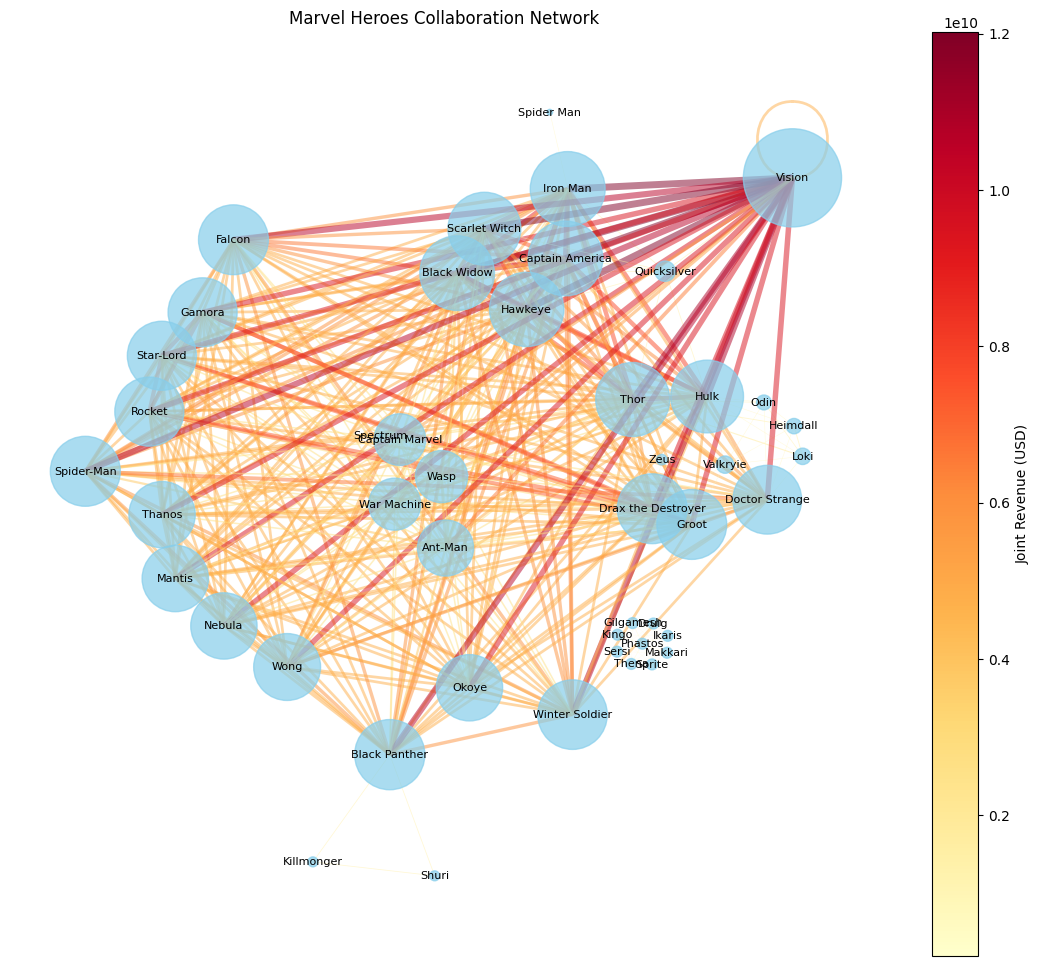

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import itertools

# Load the box office dataset
box_office_data = pd.read_csv('MarvelBoxOffice.csv')

# Initialize an empty dictionary to store joint revenue for each hero pair
collaborator_total_revenue = {}

# Iterate through each row of the dataframe
for index, row in box_office_data.iterrows():
    heroes = row['Heros'].split(", ")
    for pair in itertools.combinations(heroes, 2):
        if '' in pair:
            continue
        pair = tuple(sorted(pair))
        revenue = float(row['Worldwide Revenue (USD)'].replace(',', ''))
        if pair in collaborator_total_revenue:
            collaborator_total_revenue[pair] += revenue
        else:
            collaborator_total_revenue[pair] = revenue

# Calculate individual hero total revenue
hero_total_revenue = {}
for pair, revenue in collaborator_total_revenue.items():
    for hero in pair:
        hero_total_revenue[hero] = hero_total_revenue.get(hero, 0) + revenue

# Create a new networkx graph
G = nx.Graph()

# Add nodes and edges with normalized sizes and weights
max_size = max(hero_total_revenue.values())
node_sizes = {hero: 5000 * (revenue / max_size) for hero, revenue in hero_total_revenue.items()}
for hero, size in node_sizes.items():
    G.add_node(hero, size=size)

max_weight = max(collaborator_total_revenue.values())
for (hero1, hero2), revenue in collaborator_total_revenue.items():
    G.add_edge(hero1, hero2, weight=5 * (revenue / max_weight), revenue=revenue)

# Define color map for edges
edge_colors = np.array([G[u][v]['revenue'] for u, v in G.edges()])
color_map = plt.get_cmap('YlOrRd')
scaled_colors = (edge_colors - min(edge_colors)) / (max(edge_colors) - min(edge_colors))

# Use a more spaced layout
pos = nx.kamada_kawai_layout(G)

# Draw the graph
plt.figure(figsize=(14, 12))
nx.draw_networkx_nodes(G, pos, node_size=[size for size in node_sizes.values()], node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=[G[u][v]['weight'] for u, v in G.edges()], alpha=0.5, edge_color=scaled_colors, edge_cmap=color_map)
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
plt.colorbar(plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=min(edge_colors), vmax=max(edge_colors))), label='Joint Revenue (USD)')

plt.title('Marvel Heroes Collaboration Network')
plt.axis('off')  # Turn off the axis
plt.show()


In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the data
box_office_data = pd.read_csv('MarvelBoxOffice.csv')

# Data Cleaning: Convert monetary values to floats and replace commas
columns_to_clean = ['Budget(USD)', 'Domestic Revenue (USD)', 'International Revenue (USD)',
                    'Worldwide Revenue (USD)', 'Profit']
for column in columns_to_clean:
    box_office_data[column] = box_office_data[column].replace('[\$,]', '', regex=True).astype(float)

# Encode categorical data
categorical_columns = ['director', 'Genre', 'release platform', 'Distributor']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    box_office_data[column] = le.fit_transform(box_office_data[column].astype(str))
    label_encoders[column] = le

# Select features and target for the model
features = ['Budget(USD)', 'director', 'Phase', 'Genre', 'release platform', 'Distributor']
X = box_office_data[features]
y_revenue = box_office_data['Worldwide Revenue (USD)']
y_profit = box_office_data['Profit']

# Split the data into training and test sets
X_train_revenue, X_test_revenue, y_train_revenue, y_test_revenue = train_test_split(X, y_revenue, test_size=0.2, random_state=42)
X_train_profit, X_test_profit, y_train_profit, y_test_profit = train_test_split(X, y_profit, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_revenue_scaled = scaler.fit_transform(X_train_revenue)
X_test_revenue_scaled = scaler.transform(X_test_revenue)
X_train_profit_scaled = scaler.fit_transform(X_train_profit)
X_test_profit_scaled = scaler.transform(X_test_profit)

# Instantiate and train the RandomForest models
model_revenue = RandomForestRegressor(n_estimators=100, random_state=42)
model_profit = RandomForestRegressor(n_estimators=100, random_state=42)
model_revenue.fit(X_train_revenue_scaled, y_train_revenue)
model_profit.fit(X_train_profit_scaled, y_train_profit)

# Make predictions
y_pred_revenue = model_revenue.predict(X_test_revenue_scaled)
y_pred_profit = model_profit.predict(X_test_profit_scaled)

# Evaluate the models
mse_revenue = mean_squared_error(y_test_revenue, y_pred_revenue)
mse_profit = mean_squared_error(y_test_profit, y_pred_profit)

print(f'Mean Squared Error for Revenue Prediction: {mse_revenue}')
print(f'Mean Squared Error for Profit Prediction: {mse_profit}')


Mean Squared Error for Revenue Prediction: 2.4898629464961885e+17
Mean Squared Error for Profit Prediction: 2.5406855511635875e+17


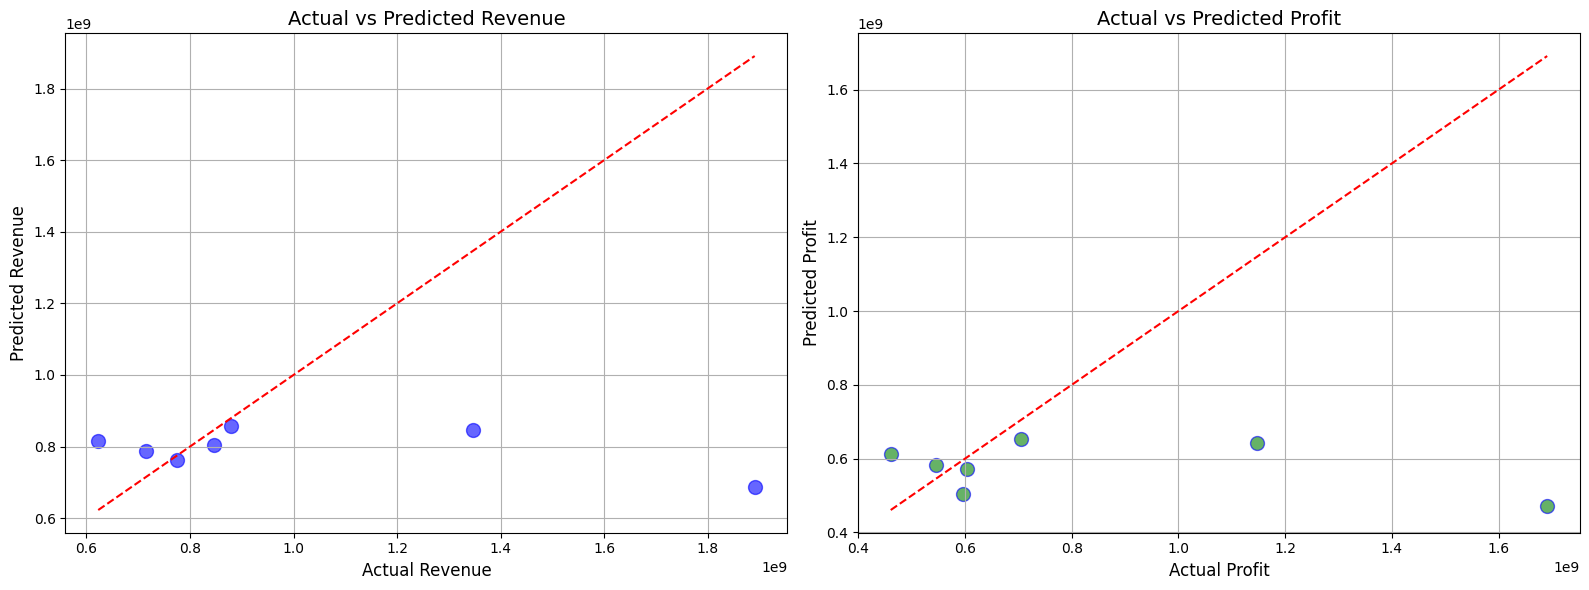

In [74]:
import matplotlib.pyplot as plt

# Plot regression for Revenue and Profit Predictions
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Actual vs Predicted Revenue
ax[0].scatter(y_test_revenue, y_pred_revenue, alpha=0.6, s=100, marker='o', color='blue', edgecolors='b')
ax[0].plot([min(y_test_revenue), max(y_test_revenue)], [min(y_test_revenue), max(y_test_revenue)], 'r--')
ax[0].set_xlabel('Actual Revenue', fontsize=12)
ax[0].set_ylabel('Predicted Revenue', fontsize=12)
ax[0].set_title('Actual vs Predicted Revenue', fontsize=14)
ax[0].grid(True)
ax[0].ticklabel_format(style='sci', axis='both', scilimits=(0, 0))

# Actual vs Predicted Profit
ax[1].scatter(y_test_profit, y_pred_profit, alpha=0.6, s=100, marker='o', color='green', edgecolors='b')
ax[1].plot([min(y_test_profit), max(y_test_profit)], [min(y_test_profit), max(y_test_profit)], 'r--')
ax[1].set_xlabel('Actual Profit', fontsize=12)
ax[1].set_ylabel('Predicted Profit', fontsize=12)
ax[1].set_title('Actual vs Predicted Profit', fontsize=14)
ax[1].grid(True)
ax[1].ticklabel_format(style='sci', axis='both', scilimits=(0, 0))

plt.tight_layout()
plt.show()
